In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Pretrained model on ImageNet
from tensorflow import keras

base_model = keras.applications.VGG19(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Freeze base model
base_model.trainable = False


In [ ]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)


# Add final dense layer
outputs = keras.layers.Dense(85, activation = 'softmax')(x)


# Combine inputs and outputs to create model
model = keras.Model(inputs,outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 85)                43605     
                                                                 
Total params: 20,067,989
Trainable params: 43,605
Non-trainable params: 20,024,384
_________________________________________________________________


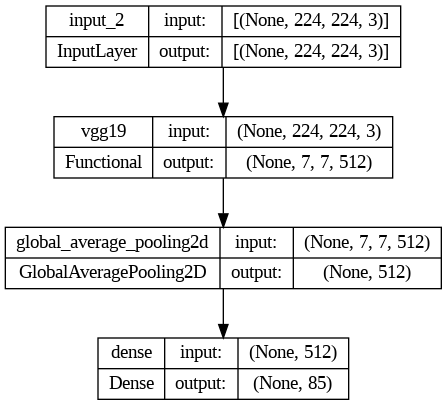

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# compile the model with loss and metrics options
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
#Augment the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True) # randomnly flip images

In [ ]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/trafficsigns/train', 
                                       target_size=(224,224), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/trafficsigns/test', 
                                      target_size=(224,224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 4438 images belonging to 85 classes.
Found 1288 images belonging to 85 classes.


In [ ]:
import pickle
from tensorflow.keras.callbacks import ModelCheckpoint

# File Path to store the trained models
filepath = "/content/drive/MyDrive/trafficsigns"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True)
callbacks_list = [checkpoint1]


history = model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/32,
          validation_steps=valid_it.samples/32,
          epochs=10,
          callbacks=callbacks_list)

import matplotlib.pyplot as pyplot
%matplotlib inline

pyplot.subplots_adjust(hspace=0.9)

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')

pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/10
139/138 [==============================] - ETA: -7s - loss: 4.4698 - accuracy: 0.2253
Epoch 1: val_accuracy improved from -inf to 0.30745, saving model to /content/drive/MyDrive/trafficsigns


138/138 [==============================] - 4399s 32s/step - loss: 4.4698 - accuracy: 0.2253 - val_loss: 3.3625 - val_accuracy: 0.3075
Epoch 2/10
139/138 [==============================] - ETA: -7s - loss: 2.4887 - accuracy: 0.4290
Epoch 2: val_accuracy improved from 0.30745 to 0.40761, saving model to /content/drive/MyDrive/trafficsigns


138/138 [==============================] - 4384s 32s/step - loss: 2.4887 - accuracy: 0.4290 - val_loss: 2.6205 - val_accuracy: 0.4076
Epoch 3/10
139/138 [==============================] - ETA: -7s - loss: 1.9142 - accuracy: 0.5192
Epoch 3: val_accuracy improved from 0.40761 to 0.47826, saving model to /content/drive/MyDrive/trafficsigns


138/138 [==============================] - 4367s 32s/step - loss: 1.9142 - accuracy: 0.5192 - val_loss: 2.3517 - val_accuracy: 0.4783
Epoch 4/10
139/138 [==============================] - ETA: -7s - loss: 1.6471 - accuracy: 0.5732
Epoch 4: val_accuracy improved from 0.47826 to 0.51475, saving model to /content/drive/MyDrive/trafficsigns


138/138 [==============================] - 4415s 32s/step - loss: 1.6471 - accuracy: 0.5732 - val_loss: 2.1046 - val_accuracy: 0.5148
Epoch 5/10
139/138 [==============================] - ETA: -7s - loss: 1.4460 - accuracy: 0.6070
Epoch 5: val_accuracy improved from 0.51475 to 0.53649, saving model to /content/drive/MyDrive/trafficsigns


138/138 [==============================] - 4296s 31s/step - loss: 1.4460 - accuracy: 0.6070 - val_loss: 1.9930 - val_accuracy: 0.5365
Epoch 6/10
139/138 [==============================] - ETA: -7s - loss: 1.2825 - accuracy: 0.6462
Epoch 6: val_accuracy improved from 0.53649 to 0.56211, saving model to /content/drive/MyDrive/trafficsigns


138/138 [==============================] - 4234s 31s/step - loss: 1.2825 - accuracy: 0.6462 - val_loss: 1.9139 - val_accuracy: 0.5621
Epoch 7/10
139/138 [==============================] - ETA: -7s - loss: 1.1944 - accuracy: 0.6685
Epoch 7: val_accuracy did not improve from 0.56211
138/138 [==============================] - 4290s 31s/step - loss: 1.1944 - accuracy: 0.6685 - val_loss: 1.8573 - val_accuracy: 0.5621
Epoch 8/10
139/138 [==============================] - ETA: -7s - loss: 1.1402 - accuracy: 0.6809
Epoch 8: val_accuracy improved from 0.56211 to 0.58230, saving model to /content/drive/MyDrive/trafficsigns


138/138 [==============================] - 4298s 31s/step - loss: 1.1402 - accuracy: 0.6809 - val_loss: 1.7422 - val_accuracy: 0.5823
Epoch 9/10
139/138 [==============================] - ETA: -7s - loss: 1.0445 - accuracy: 0.6947
Epoch 9: val_accuracy improved from 0.58230 to 0.59472, saving model to /content/drive/MyDrive/trafficsigns


138/138 [==============================] - 4310s 31s/step - loss: 1.0445 - accuracy: 0.6947 - val_loss: 1.7625 - val_accuracy: 0.5947
Epoch 10/10
139/138 [==============================] - ETA: -7s - loss: 1.0230 - accuracy: 0.6976